In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import GradientBoostingClassifier

## Import Dataset

In [2]:
df_pen = sns.load_dataset('penguins')

In [3]:
df_pen = df_pen.dropna()

In [4]:
df_pen = df_pen.sample(frac=1, random_state=42).reset_index(drop=True)

In [5]:
X = df_pen.drop(['species'], axis = 1)
y = df_pen['species']

## Data Pre-processing

In [6]:
categorical_x = ['island', 'sex']
numerical_x = X.drop(categorical_x, axis = 1).columns

In [7]:
# ## If y is categorical:
# y.fillna(y.mode(), inplace= True)
# ##If y is numerical
# # y.fillna(y.mean(), inplace= True)
# for i in numerical_x:
#     X[i].fillna(X[i].mean(), inplace = True)

# for i in categorical_x:
#     X[i].fillna(X[i].mode().iloc[0], inplace = True)
    
categoricas = pd.get_dummies(X[categorical_x], drop_first=True)
X = pd.concat([categoricas, X[numerical_x]], axis = 1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=101)

In [9]:
escalador = StandardScaler()
escalador.fit(X_train)

X_train = escalador.transform(X_train)
X_test = escalador.transform(X_test)

## Model implementation

In [10]:
model = GradientBoostingClassifier()

In [11]:
model.fit(X_train,y_train)

GradientBoostingClassifier()

In [12]:
base_pred = model.predict(X_test)

## Evaluation

In [13]:
y_pred = model.predict(X_test)

In [14]:
metrics.accuracy_score(y_test,y_pred)

0.96

In [15]:
metrics.confusion_matrix(y_test,y_pred)

array([[22,  2,  0],
       [ 0,  9,  0],
       [ 0,  0, 17]], dtype=int64)

C:\Users\andre\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


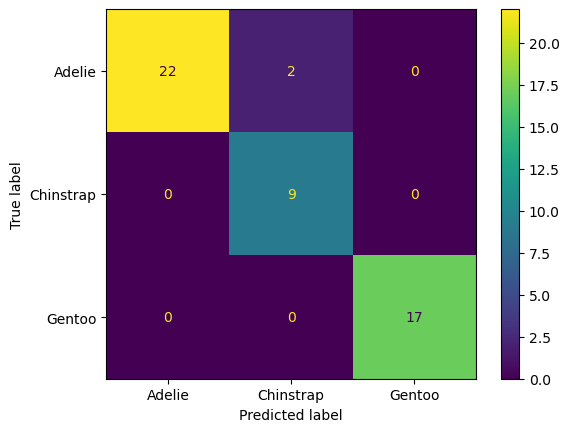

In [16]:
metrics.plot_confusion_matrix(model, X_test,y_test)

C:\Users\andre\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


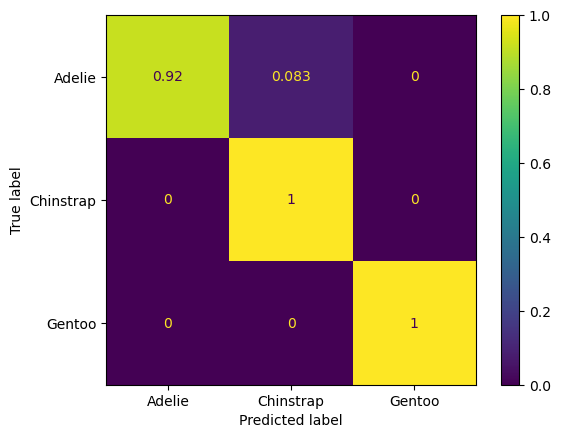

In [17]:
metrics.plot_confusion_matrix(model, X_test,y_test,normalize='true')

In [18]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Adelie       1.00      0.92      0.96        24
   Chinstrap       0.82      1.00      0.90         9
      Gentoo       1.00      1.00      1.00        17

    accuracy                           0.96        50
   macro avg       0.94      0.97      0.95        50
weighted avg       0.97      0.96      0.96        50



In [19]:
model.feature_importances_

array([1.42320699e-01, 2.46986423e-02, 3.14917208e-08, 4.64174467e-01,
       3.06576950e-02, 3.36940527e-01, 1.20793917e-03])

In [20]:
df_feature_importance = pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance'])
df_feature_importance = df_feature_importance.sort_values('Feature Importance', ascending = False)
df_feature_importance

,Feature Importance
bill_length_mm,4.641745e-01
flipper_length_mm,3.369405e-01
island_Dream,1.423207e-01
bill_depth_mm,3.065769e-02
island_Torgersen,2.469864e-02
body_mass_g,1.207939e-03
sex_Male,3.149172e-08


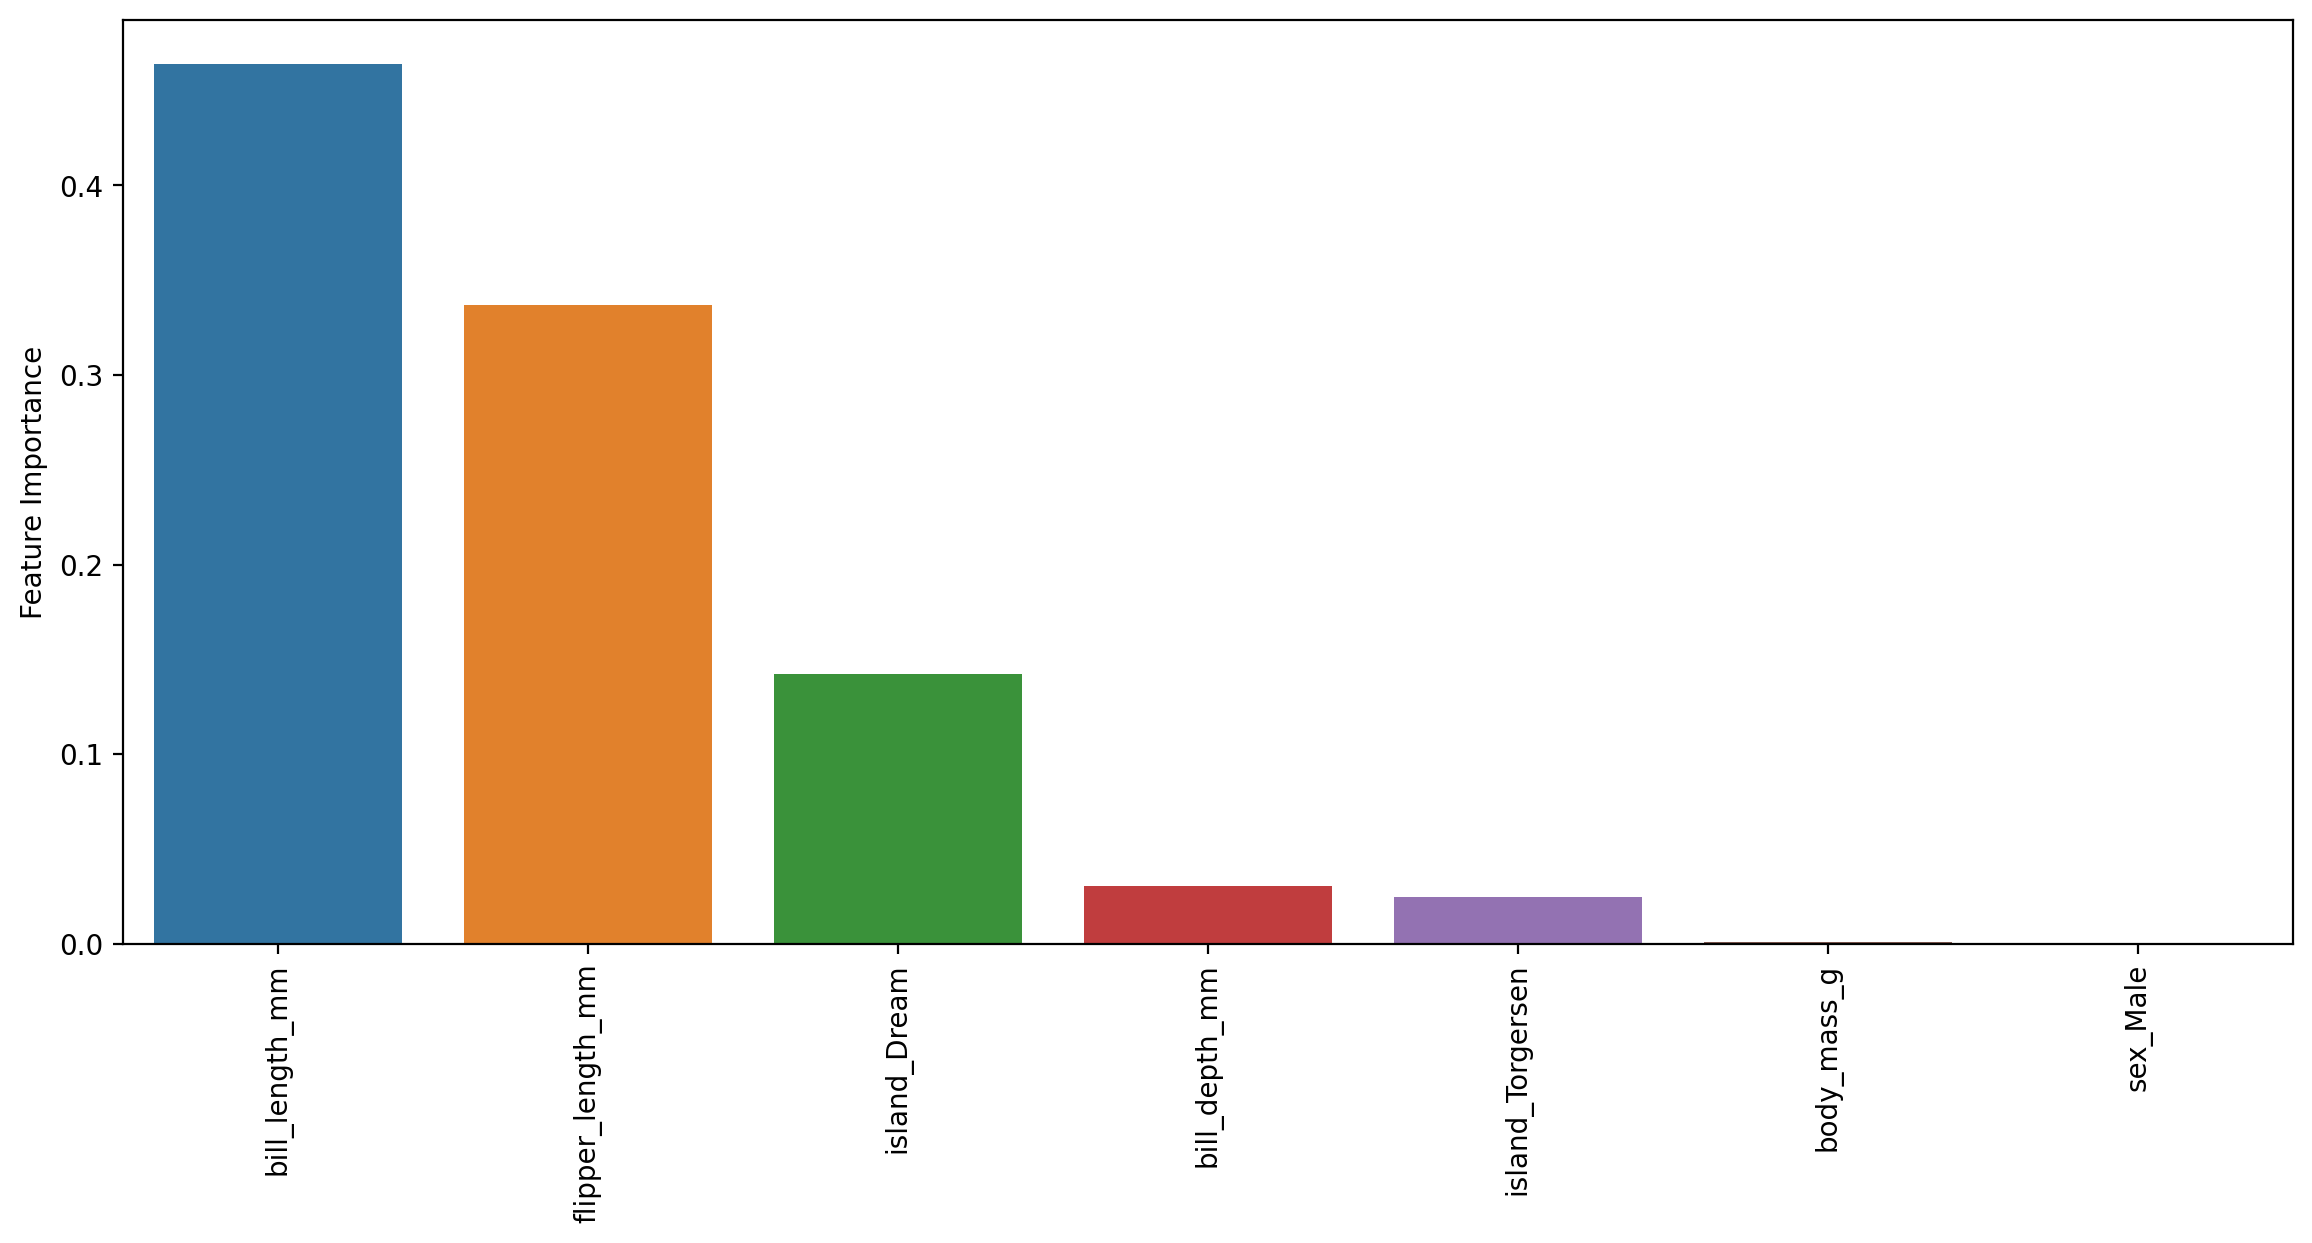

In [21]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data = df_feature_importance,x=df_feature_importance.index,y='Feature Importance')

plt.xticks(rotation=90);

## Grid Search

In [22]:
model = GradientBoostingClassifier()

In [23]:
parametros = {"n_estimators":[1,5,10,20,40,100],'max_depth':[3,4,5,6]}

In [24]:
grid_model = GridSearchCV(model,param_grid= parametros, cv = 5, scoring='accuracy', n_jobs=-1)

In [25]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [1, 5, 10, 20, 40, 100]},
             scoring='accuracy')

In [26]:
grid_model.best_params_

{'max_depth': 3, 'n_estimators': 5}

In [27]:
y_pred = grid_model.predict(X_test)

### Evaluation

In [28]:
metrics.accuracy_score(y_test,y_pred)

0.96

In [29]:
metrics.confusion_matrix(y_test,y_pred)

array([[22,  2,  0],
       [ 0,  9,  0],
       [ 0,  0, 17]], dtype=int64)

C:\Users\andre\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


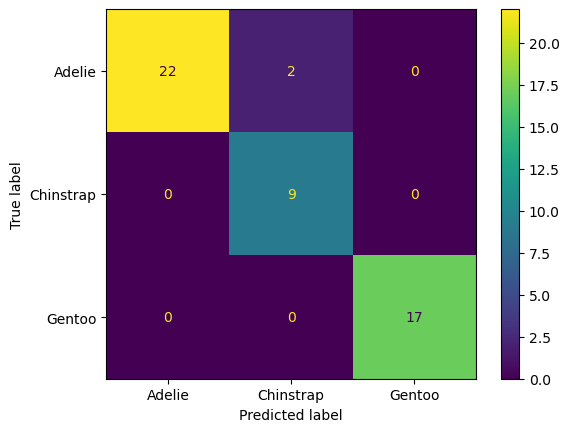

In [30]:
metrics.plot_confusion_matrix(grid_model, X_test,y_test)

C:\Users\andre\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


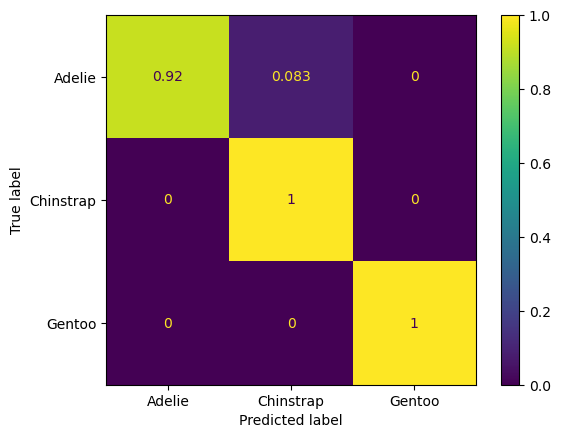

In [31]:
metrics.plot_confusion_matrix(grid_model, X_test,y_test,normalize='true')

In [32]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Adelie       1.00      0.92      0.96        24
   Chinstrap       0.82      1.00      0.90         9
      Gentoo       1.00      1.00      1.00        17

    accuracy                           0.96        50
   macro avg       0.94      0.97      0.95        50
weighted avg       0.97      0.96      0.96        50



In [33]:
grid_model.best_estimator_.feature_importances_

array([0.14696655, 0.02591355, 0.        , 0.46771763, 0.01950159,
       0.33990068, 0.        ])

In [34]:
df_feature_importance = pd.DataFrame(index=X.columns,data=grid_model.best_estimator_.feature_importances_,columns=['Feature Importance'])
df_feature_importance = df_feature_importance.sort_values('Feature Importance', ascending = False)
df_feature_importance

,Feature Importance
bill_length_mm,0.467718
flipper_length_mm,0.339901
island_Dream,0.146967
island_Torgersen,0.025914
bill_depth_mm,0.019502
sex_Male,0.000000
body_mass_g,0.000000


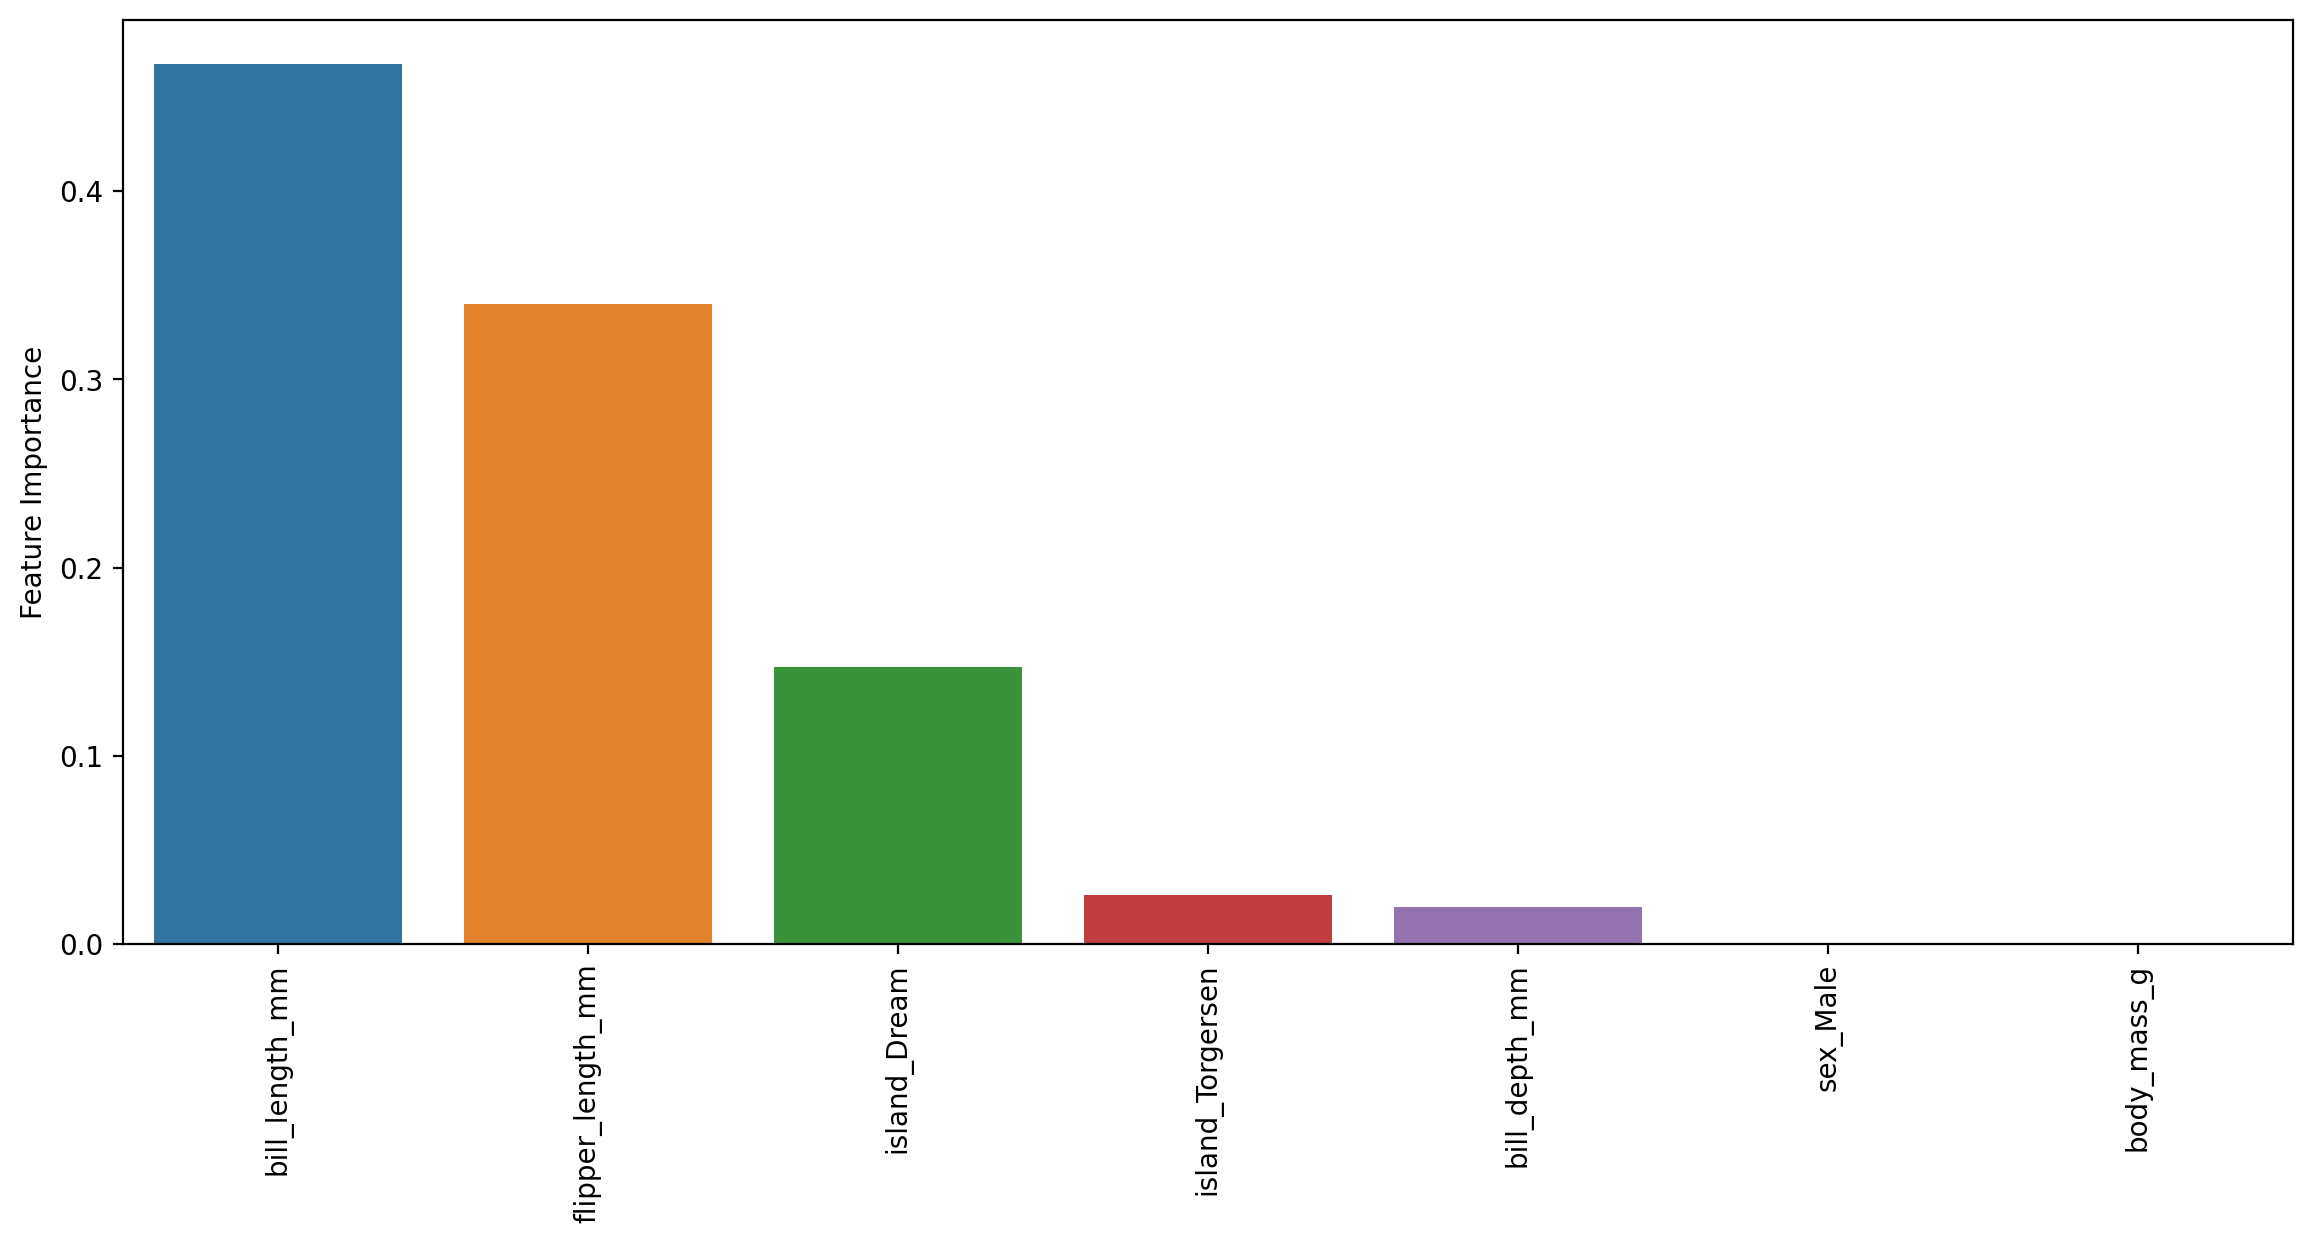

In [35]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data = df_feature_importance,x=df_feature_importance.index,y='Feature Importance')

plt.xticks(rotation=90);

## Elbow

In [36]:
errors = []
misclassifications = []

for n in range(1,64):
    rfc = GradientBoostingClassifier( n_estimators=n)
    rfc.fit(X_train,y_train)
    preds = rfc.predict(X_test)
    err = 1 - metrics.accuracy_score(preds,y_test)
    n_missed = np.sum(preds != y_test)
    errors.append(err)
    misclassifications.append(n_missed)

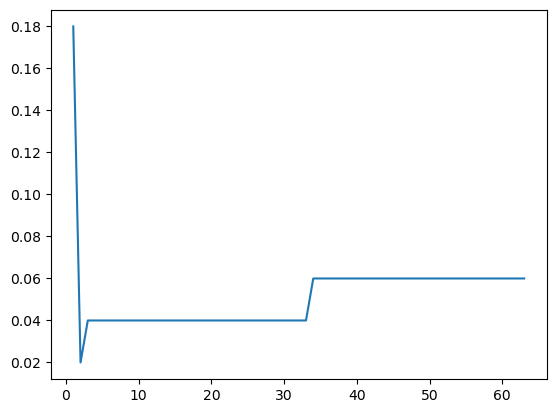

In [37]:
plt.plot(range(1,64),errors)

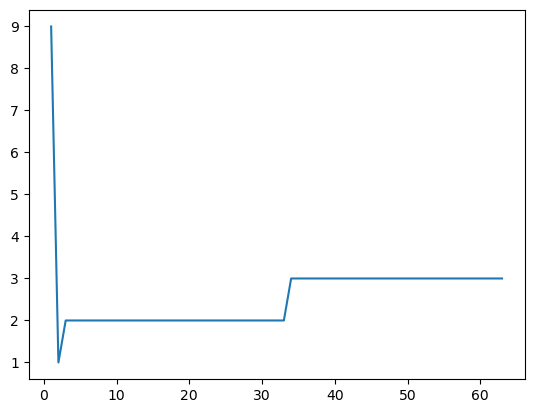

In [38]:
plt.plot(range(1,64),misclassifications)

## Full Training

In [39]:
escalador = StandardScaler()
scaled_X = escalador.fit_transform(X)

In [40]:
model = GradientBoostingClassifier(max_depth = 5, n_estimators=10)

In [41]:
model.fit(scaled_X,y)

GradientBoostingClassifier(max_depth=5, n_estimators=10)

## Using Joblib to dump the model

In [42]:
import joblib

In [43]:
joblib.dump(model,'final_model.pkl')

['final_model.pkl']

In [44]:
list(X.columns)

['island_Dream',
 'island_Torgersen',
 'sex_Male',
 'bill_length_mm',
 'bill_depth_mm',
 'flipper_length_mm',
 'body_mass_g']

In [45]:
joblib.dump(list(X.columns),'column_names.pkl')

['column_names.pkl']

In [46]:
def formato_filas (entrada, column_names = list(X.columns), scaler = escalador):
    respuesta = pd.Series(data = np.zeros(len(column_names)), index = column_names)
    if entrada['island'] == 'Dream':
        respuesta['island_Dream'] = 1
    if entrada['island'] == 'Torgersen':
        respuesta['island_Torgersen'] = 1
    if entrada['sex'] == 'Male':
        respuesta['sex_Male'] = 1
    respuesta['bill_length_mm'] = entrada['bill_length_mm']
    respuesta['bill_depth_mm'] = entrada['bill_depth_mm']
    respuesta['flipper_length_mm'] = entrada['flipper_length_mm']
    respuesta['body_mass_g'] = entrada['body_mass_g']
    
    return escalador.transform([respuesta.values])
    

In [47]:
joblib.dump(escalador,'escalador.pkl')

['escalador.pkl']

## Loading pickles

In [48]:
col_names = joblib.load('column_names.pkl')

In [49]:
col_names

['island_Dream',
 'island_Torgersen',
 'sex_Male',
 'bill_length_mm',
 'bill_depth_mm',
 'flipper_length_mm',
 'body_mass_g']

In [50]:
fila_cualquiera = df_pen.drop('species', axis = 1).iloc[5]


In [51]:
fila_cualquiera

island               Biscoe
bill_length_mm         44.9
bill_depth_mm          13.8
flipper_length_mm     212.0
body_mass_g          4750.0
sex                  Female
Name: 5, dtype: object

In [52]:
fila_cualquiera_formateada = formato_filas(fila_cualquiera)

C:\Users\andre\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [53]:
fila_cualquiera_formateada

array([[-0.76531973, -0.40538335, -1.00904996,  0.16614144, -1.7112878 ,
         0.78837197,  0.67529725]])

In [54]:
loaded_model = joblib.load('final_model.pkl')

In [55]:
loaded_model.predict(fila_cualquiera_formateada)

array(['Gentoo'], dtype=object)

In [56]:
df_pen

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Dream,39.5,16.7,178.0,3250.0,Female
1,Gentoo,Biscoe,46.9,14.6,222.0,4875.0,Female
2,Adelie,Torgersen,42.1,19.1,195.0,4000.0,Male
3,Chinstrap,Dream,49.8,17.3,198.0,3675.0,Female
4,Adelie,Biscoe,41.1,18.2,192.0,4050.0,Male
...,...,...,...,...,...,...,...
328,Chinstrap,Dream,50.9,19.1,196.0,3550.0,Male
329,Adelie,Torgersen,37.2,19.4,184.0,3900.0,Male
330,Adelie,Biscoe,39.7,17.7,193.0,3200.0,Female
331,Gentoo,Biscoe,45.5,15.0,220.0,5000.0,Male


In [57]:
{'island': 'Adelie', 'island': 'Dream', 'bill_length_mm': 39.5, 'bill_depth_mm': 16.7, 'flipper_length_mm': 178.0, 'body_mass_g': 3250.0, 'sex': 'Female'}

{'island': 'Dream',
 'bill_length_mm': 39.5,
 'bill_depth_mm': 16.7,
 'flipper_length_mm': 178.0,
 'body_mass_g': 3250.0,
 'sex': 'Female'}

In [62]:
df_pen

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Dream,39.5,16.7,178.0,3250.0,Female
1,Gentoo,Biscoe,46.9,14.6,222.0,4875.0,Female
2,Adelie,Torgersen,42.1,19.1,195.0,4000.0,Male
3,Chinstrap,Dream,49.8,17.3,198.0,3675.0,Female
4,Adelie,Biscoe,41.1,18.2,192.0,4050.0,Male
...,...,...,...,...,...,...,...
328,Chinstrap,Dream,50.9,19.1,196.0,3550.0,Male
329,Adelie,Torgersen,37.2,19.4,184.0,3900.0,Male
330,Adelie,Biscoe,39.7,17.7,193.0,3200.0,Female
331,Gentoo,Biscoe,45.5,15.0,220.0,5000.0,Male


SyntaxError: invalid syntax (464634962.py, line 1)